# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib
print('success installed tensorflow!')


success installed tensorflow!


In [2]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
altgraph                  0.17.4
anyio                     4.5.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.2.0
auto-py-to-exe            2.43.3
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.1
bottle                    0.12.25
bottle-websocket          0.2.9
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
comtypes                  1.4.1
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml     

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

print('Success')

Success


In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr
print('Done')

Done


C:\Users\HP\AppData\Local\Temp\ipykernel_43624\288641002.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 310 files belonging to 2 classes.


In [14]:
data = tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [15]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

In [20]:
batch[1]

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

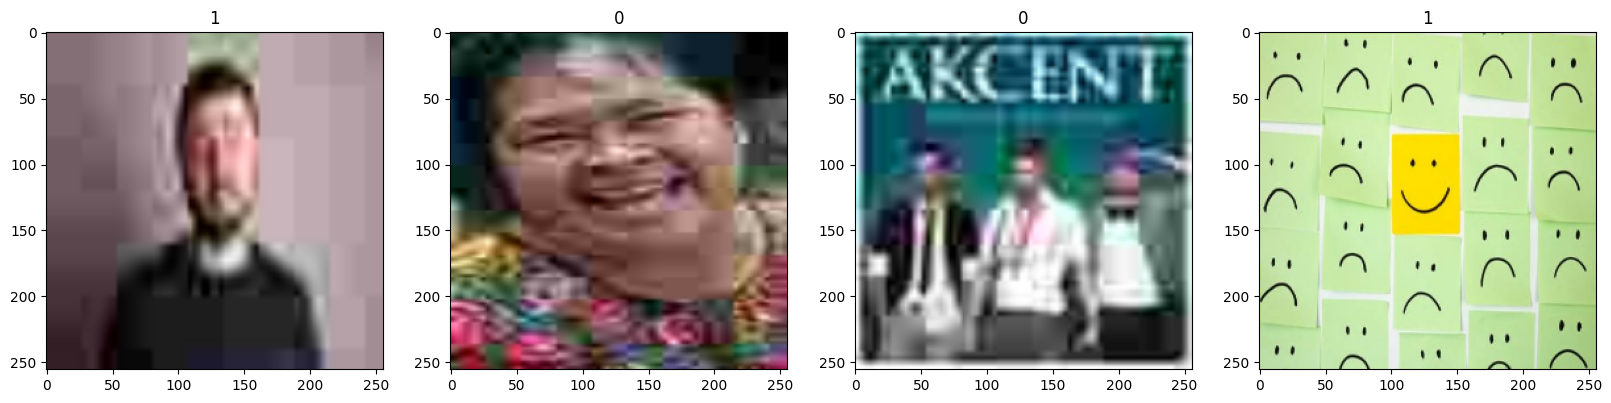

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
batch[0].max()

255.0

# 4. Scale Data

In [28]:
data = data.map(lambda x,y: (x/255, y))

In [29]:
data.as_numpy_iterator().next()

(array([[[[0.41568628, 0.34901962, 0.28627452],
          [0.41568628, 0.34901962, 0.28627452],
          [0.36344975, 0.2967831 , 0.234038  ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.41568628, 0.34901962, 0.28627452],
          [0.41568628, 0.34901962, 0.28627452],
          [0.36344975, 0.2967831 , 0.234038  ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.41568628, 0.34901962, 0.28627452],
          [0.41568628, 0.34901962, 0.28627452],
          [0.36344975, 0.2967831 , 0.234038  ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.35686275, 0.2901961 , 0.22745098],
          [0.35686

# 5. Split Data

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [31]:
train_size

7

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [33]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add Conv2D layers
# Input shape should be (256, 256, 3) for RGB images, and (256, 256, 1) for grayscale
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)))  # Correct input shape
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

# Flatten the output from Conv2D layers
model.add(Flatten())

# Fully connected layers (Dense layers)
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification
print('no error on console');

no error on console


In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step - accuracy: 0.9860 - loss: 0.0396 - val_accuracy: 1.0000 - val_loss: 0.0202
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 0.9901 - loss: 0.0352 - val_accuracy: 1.0000 - val_loss: 0.0168
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 513ms/step - accuracy: 0.9952 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 0.0181
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - accuracy: 0.9858 - loss: 0.0339 - val_accuracy: 0.9844 - val_loss: 0.0442
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 466ms/step - accuracy: 0.9875 - loss: 0.0443 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 465ms/step - accuracy: 0.9921 - loss: 0.0283 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - accuracy: 0.9939 - loss: 0.0136 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 447ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9844 - val_loss:

KeyboardInterrupt: 

# 8. Plot Performance

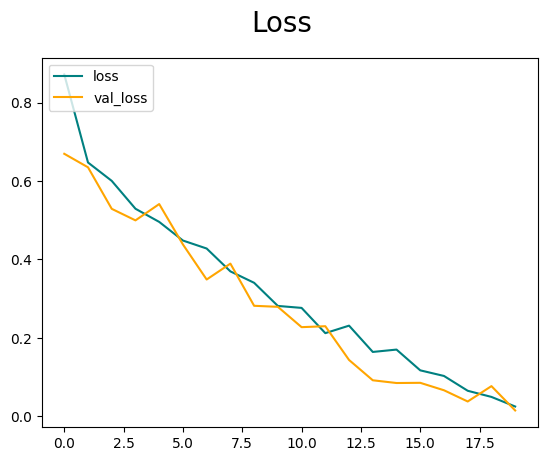

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

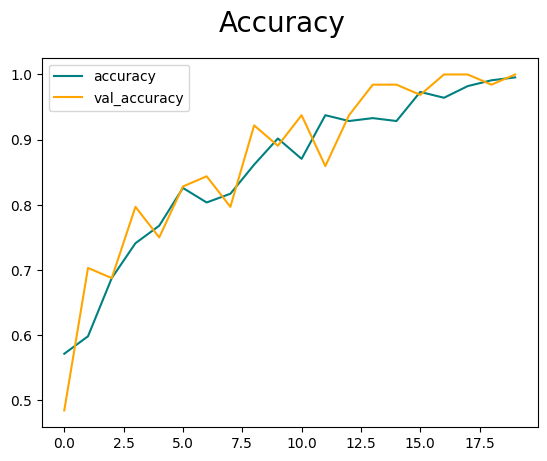

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [56]:
print(f'Precision: {pre.result().numpy()}, Result = {re.result().numpy()}, Accuracy = {acc.result().numpy()}')

Precision: 1.0, Result = 1.0, Accuracy = 1.0


# 10. Test

In [10]:
import cv2

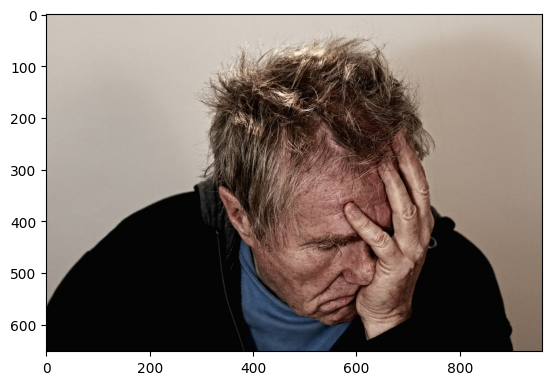

success


In [13]:
img = cv2.imread('test/sad_test3.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
print('success')

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [70]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [71]:
yhat

array([[0.00120547]], dtype=float32)

In [72]:
if yhat > 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Sad


# 11. Save the Model

In [3]:
from tensorflow.keras.models import load_model

In [86]:
import os

# Saving in TensorFlow's SavedModel format (default)
model.save(os.path.join('models', 'imageclassifier.keras'))


In [6]:
import numpy as np

In [7]:
new_model = load_model('models/imageclassifier.keras')

In [8]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined

In [92]:
yhat_new = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [93]:
yhat_new

array([[0.01049781]], dtype=float32)

In [94]:
if yhat > 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Sad
